# Generate plots for Memory Colors

Move to the root

In [1]:
%cd ..

/Users/lovhag/Projects/measure-visual-commonsense-knowledge


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
RESULTS_FILE = "memory_colors/data/results.csv"

## Load results

If the results already have been generated and saved, they can be loaded below.

In [4]:
load_results = True
if load_results:
    results = pd.read_csv(RESULTS_FILE)

In [5]:
results

,model,question_template,accuracy
0,clip-bert-explicit,Q: What is the color of [DESCRIPTOR] [ITEM]? A...,0.899083
1,clip-bert-explicit,Q: What is the color of [DESCRIPTOR] [ITEM]? [...,0.880734
2,clip-bert-explicit,Q: What is the colour of [DESCRIPTOR] [ITEM]? ...,0.871560
3,clip-bert-explicit,What is the color of [DESCRIPTOR] [ITEM]? [MASK].,0.944954
4,clip-bert-explicit,What is the color of [DESCRIPTOR] [ITEM]? [SEP...,0.908257
...,...,...,...
99,lxmert-base-uncased,[DESCRIPTOR] [ITEM] usually has the color of [...,0.431193
100,lxmert-base-uncased,What is the usual color of [DESCRIPTOR] [ITEM]...,0.495413
101,lxmert-base-uncased,What is the usual color of [DESCRIPTOR] [ITEM]...,0.458716
102,lxmert-base-uncased,What is the typical color of [DESCRIPTOR] [ITE...,0.486239


In [6]:
results.groupby(["model"]).agg({"accuracy": ["mean", "std", "min", "max"]})

accuracy                              
                                      mean       std       min       max
model                                                                   
bert-base-trained                 0.724065  0.111765  0.431193  0.798165
bert-base-trained-lxmert          0.761468  0.028277  0.688073  0.798165
bert-base-trained-lxmert-scratch  0.690191  0.039131  0.605505  0.733945
bert-base-uncased                 0.251941  0.101790  0.137615  0.394495
clip-bert-explicit                0.882145  0.066141  0.733945  0.944954
clip-bert-implicit                0.741002  0.067951  0.532110  0.798165
lxmert-base-uncased               0.494707  0.093520  0.412844  0.697248
visualbert-vqa-coco               0.275229  0.074720  0.165138  0.376147

## Generate results plot

In [7]:
RENAMES = {"bert-base-uncased": "BERT-base",
           "clip-bert-implicit": "CLIP-BERT-implicit",
           "clip-bert-explicit": "CLIP-BERT-explicit",
           "bert-base-trained": "BERT-CLIP-BERT-train",
           "lxmert-base-uncased": "LXMERT-base",
           "bert-base-trained-lxmert": "BERT-LXMERT-train",
           "bert-base-trained-lxmert-scratch": "BERT-LXMERT-train-scratch",
           "visualbert-vqa-coco": "VisualBERT"}

ORDER = ["CLIP-BERT-implicit",
         "CLIP-BERT-explicit",
         "LXMERT-base",
         "VisualBERT",
         "BERT-base",
         "BERT-CLIP-BERT-train",
         "BERT-LXMERT-train",
         "BERT-LXMERT-train-scratch"]

color_vector = sns.hls_palette(20, h=0.17, s=0.7, l=0.65)
COLORS = color_vector[-4:]+color_vector[-13:-9][::-1]+[(128/255,128/255,128/255)]

In [8]:
results["model"] = results.model.apply(lambda val: RENAMES[val])
results.head()

,model,question_template,accuracy
0,CLIP-BERT-explicit,Q: What is the color of [DESCRIPTOR] [ITEM]? A...,0.899083
1,CLIP-BERT-explicit,Q: What is the color of [DESCRIPTOR] [ITEM]? [...,0.880734
2,CLIP-BERT-explicit,Q: What is the colour of [DESCRIPTOR] [ITEM]? ...,0.871560
3,CLIP-BERT-explicit,What is the color of [DESCRIPTOR] [ITEM]? [MASK].,0.944954
4,CLIP-BERT-explicit,What is the color of [DESCRIPTOR] [ITEM]? [SEP...,0.908257


In [9]:
tmp_data = results.copy()
tmp_data["x"] = [1]*len(tmp_data)
tmp_data.head()

,model,question_template,accuracy,x
0,CLIP-BERT-explicit,Q: What is the color of [DESCRIPTOR] [ITEM]? A...,0.899083,1
1,CLIP-BERT-explicit,Q: What is the color of [DESCRIPTOR] [ITEM]? [...,0.880734,1
2,CLIP-BERT-explicit,Q: What is the colour of [DESCRIPTOR] [ITEM]? ...,0.871560,1
3,CLIP-BERT-explicit,What is the color of [DESCRIPTOR] [ITEM]? [MASK].,0.944954,1
4,CLIP-BERT-explicit,What is the color of [DESCRIPTOR] [ITEM]? [SEP...,0.908257,1


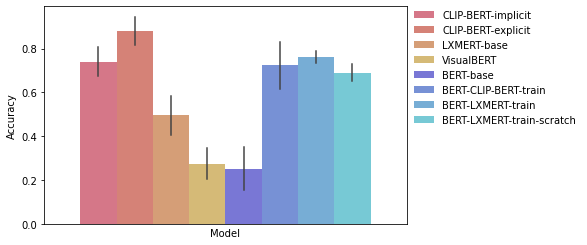

In [10]:
plt.figure(figsize=(6.5,4))

sns.barplot(x="x", y="accuracy", hue="model", ci="sd", palette=COLORS, hue_order=ORDER, data=tmp_data, errwidth=1.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., frameon=False)
plt.xticks([],[])
plt.xlabel("Model")
plt.ylabel("Accuracy")

plt.savefig("images/memory_colors_results.png", bbox_inches='tight')
plt.show()